# Canonical Signal

In [1]:
import sys
sys.path.append("../src")

In [2]:
from data.signal_dataset import SignalDataset
import data.preparation_eurythmy_data as ped
import matplotlib.pyplot as plt

## Function Definition

In [3]:
def get_class_indices(input_list):
    class_indices = {}
    for idx, value in enumerate(input_list):
        if value not in class_indices:
            class_indices[value] = []
        class_indices[value].append(idx)
    return class_indices

In [4]:
def plot_waveforms(wave1, wave2, sample_rate=10000, label1='Waveform 1', label2='Waveform 2', title='Waveform Comparison'):
    """
    Plots two waveforms on the same chart.

    :param wave1: The first waveform to plot.
    :param wave2: The second waveform to plot.
    :param sample_rate: The sample rate of the waveforms. Default is 10000.
    :param label1: The label for the first waveform.
    :param label2: The label for the second waveform.
    :param title: The title of the plot.
    """
    # Generate a time axis
    time_axis = [i / sample_rate for i in range(len(wave1))]

    # Plot the waveforms
    plt.plot(time_axis, wave1, label=label1)
    plt.plot(time_axis, wave2, label=label2)

    # Adding labels and title
    plt.xlabel('Time (seconds)')
    plt.ylabel('Amplitude')
    plt.title(title)

    # Show legend
    plt.legend()

    # Display the plot
    plt.show()


In [5]:
import matplotlib.pyplot as plt

def plot_multiple_waveforms(waveforms, sample_rate=10000, labels=None, title='Waveform Comparison'):
    """
    Plots multiple waveforms on the same chart.

    :param waveforms: List of waveforms to plot.
    :param sample_rate: The sample rate of the waveforms. Default is 10000.
    :param labels: List of labels for the waveforms. If None, default labels are used.
    :param title: The title of the plot.
    """
    assert len(waveforms) > 0, "No waveforms provided for plotting"
    
    # Use default labels if none are provided
    if labels is None:
        labels = [f'Waveform {i+1}' for i in range(len(waveforms))]

    assert len(waveforms) == len(labels), "Number of waveforms and labels must match"

    # Generate a time axis
    time_axis = [i / sample_rate for i in range(len(waveforms[0]))]

    # Plot each waveform
    for i, wave in enumerate(waveforms):
        plt.plot(time_axis, wave, label=labels[i])

    # Adding labels and title
    plt.xlabel('Time (seconds)')
    plt.ylabel('Amplitude')
    plt.title(title)

    # Show legend
    plt.legend()

    # Display the plot
    plt.show()

## Data Import

In [6]:
signal_dataset_path= r"..\data\processed\signal_dataset"
signal_dataset = SignalDataset.load(file_path= signal_dataset_path)

## Plant Signal

In [7]:
avg_signal= signal_dataset.average_signal(signal_dataset.indexes)

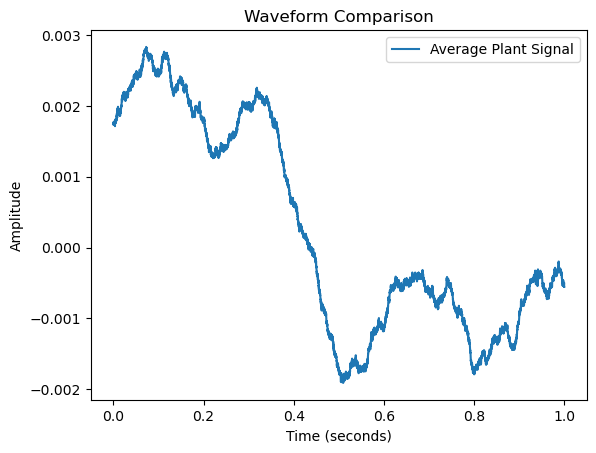

In [8]:
plot_multiple_waveforms(waveforms= [avg_signal], labels=['Average Plant Signal'])

## RQ1

In [4]:
rq1_signal_dataset= signal_dataset.copy()
rq1_indexes, rq1_targets= ped.get_indexes_and_targets_by_rq(1, rq1_signal_dataset.features)
rq1_signal_dataset.features= rq1_signal_dataset.features.iloc[rq1_indexes]
rq1_signal_dataset.features.reset_index(drop=True, inplace=True)

In [8]:
rq1_classes_indices= get_class_indices(rq1_targets)

In [9]:
avg_eurythmy= signal_dataset.average_signal(rq1_classes_indices[1])
avg_control= signal_dataset.average_signal(rq1_classes_indices[0])

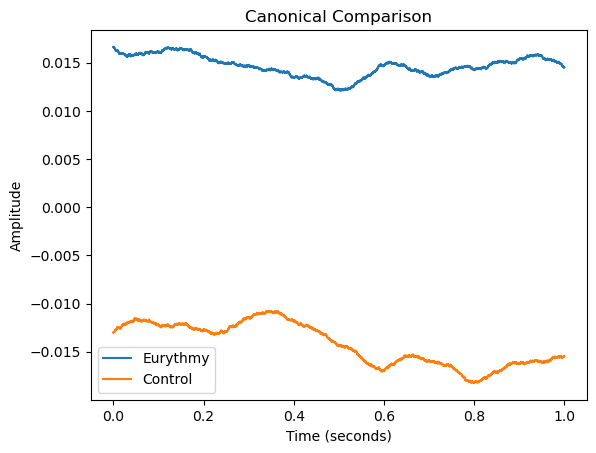

In [14]:
plot_multiple_waveforms(waveforms= [avg_eurythmy, avg_control], labels=['Eurythmy','Control'], title='Canonical Comparison')

### Removing constant signals (noise?)

In [15]:
rq1_signal_dataset.remove_constant_signals()

In [16]:
rq1_signal_dataset.features.reset_index(drop=True, inplace=True)
rq1_indexes, rq1_targets= ped.get_indexes_and_targets_by_rq(1, rq1_signal_dataset.features)
rq1_signal_dataset.features= rq1_signal_dataset.features.iloc[rq1_indexes]
rq1_signal_dataset.features.reset_index(drop=True, inplace=True)

In [17]:
rq1_classes_indices= get_class_indices(rq1_targets)

In [18]:
avg_eurythmy= signal_dataset.average_signal(rq1_classes_indices[1])
avg_control= signal_dataset.average_signal(rq1_classes_indices[0])

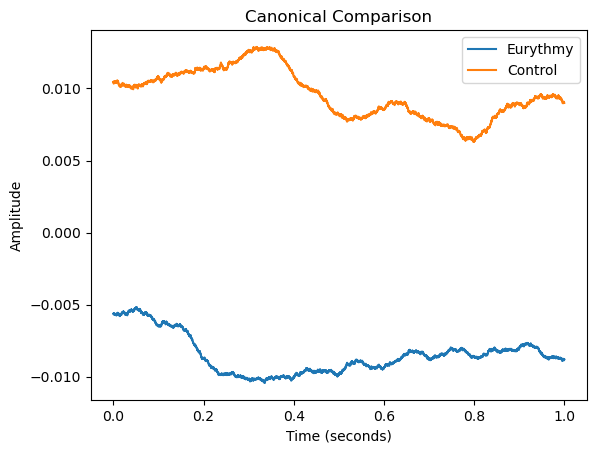

In [19]:
plot_multiple_waveforms(waveforms= [avg_eurythmy, avg_control], labels=['Eurythmy','Control'], title='Canonical Comparison')

In [ ]:
del rq1_signal_dataset

## RQ2

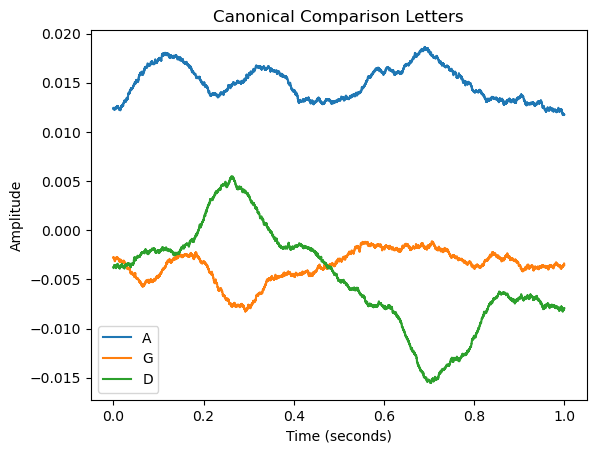

CPU times: total: 43min 23s
Wall time: 47min 48s


In [22]:
%%time

rq2_signal_dataset= signal_dataset.copy()
rq2_indexes, rq2_targets= ped.get_indexes_and_targets_by_rq(2, rq2_signal_dataset.features)
rq2_signal_dataset.features= rq2_signal_dataset.features.iloc[rq2_indexes]
rq2_signal_dataset.features.reset_index(drop=True, inplace=True)

rq2_classes_indices= get_class_indices(rq2_targets)
avg_A= signal_dataset.average_signal(rq2_classes_indices[0])
avg_G= signal_dataset.average_signal(rq2_classes_indices[1])
avg_D= signal_dataset.average_signal(rq2_classes_indices[2])

plot_multiple_waveforms(waveforms= [avg_A, avg_G, avg_D], labels=['A','G','D'], title='Canonical Comparison Letters')

### Removing constant signals (noise?)

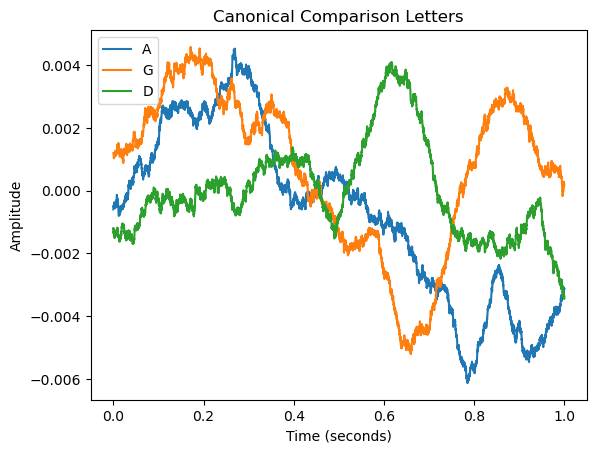

In [31]:
rq2_signal_dataset.remove_constant_signals()

rq2_signal_dataset.features.reset_index(drop=True, inplace=True)
rq2_indexes, rq2_targets= ped.get_indexes_and_targets_by_rq(2, rq2_signal_dataset.features)
rq2_signal_dataset.features= rq2_signal_dataset.features.iloc[rq2_indexes]
rq2_signal_dataset.features.reset_index(drop=True, inplace=True)

rq2_classes_indices= get_class_indices(rq2_targets)
avg_A= signal_dataset.average_signal(rq2_classes_indices[0])
avg_G= signal_dataset.average_signal(rq2_classes_indices[1])
avg_D= signal_dataset.average_signal(rq2_classes_indices[2])

plot_multiple_waveforms(waveforms= [avg_A, avg_G, avg_D], labels=['A','G','D'], title='Canonical Comparison Letters')

In [ ]:
del rq2_signal_dataset

## RQ3

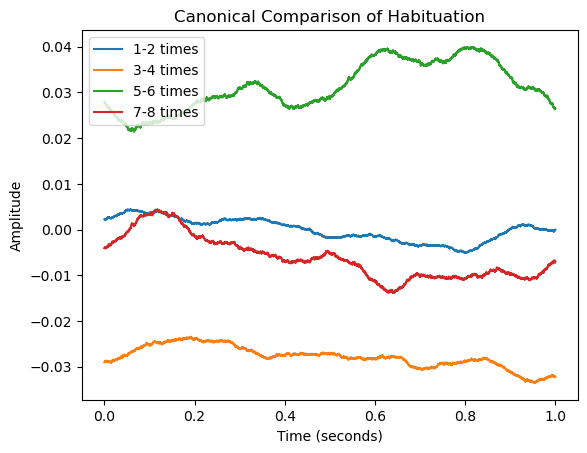

CPU times: total: 4min 19s
Wall time: 4min 51s


In [32]:
%%time

rq3_signal_dataset= signal_dataset.copy()
rq3_indexes, rq3_targets= ped.get_indexes_and_targets_by_rq(3, rq3_signal_dataset.features)
rq3_signal_dataset.features= rq3_signal_dataset.features.iloc[rq3_indexes]
rq3_signal_dataset.features.reset_index(drop=True, inplace=True)

rq3_classes_indices= get_class_indices(rq3_targets)
avg_1_2= signal_dataset.average_signal(rq3_classes_indices[0])
avg_3_4= signal_dataset.average_signal(rq3_classes_indices[1])
avg_5_6= signal_dataset.average_signal(rq3_classes_indices[2])
avg_7_8= signal_dataset.average_signal(rq3_classes_indices[3])

plot_multiple_waveforms(waveforms= [avg_1_2, avg_3_4, avg_5_6, avg_7_8], labels=['1-2 times','3-4 times','5-6 times', '7-8 times'],
                        title='Canonical Comparison of Habituation')

### Removing constant signals (noise?)

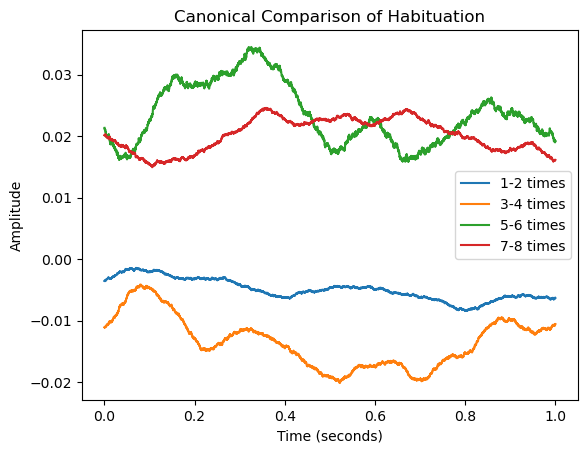

In [33]:
rq3_signal_dataset.remove_constant_signals()

rq3_signal_dataset.features.reset_index(drop=True, inplace=True)
rq3_indexes, rq3_targets= ped.get_indexes_and_targets_by_rq(3, rq3_signal_dataset.features)
rq3_signal_dataset.features= rq3_signal_dataset.features.iloc[rq3_indexes]
rq3_signal_dataset.features.reset_index(drop=True, inplace=True)

rq3_classes_indices= get_class_indices(rq3_targets)
avg_1_2= signal_dataset.average_signal(rq3_classes_indices[0])
avg_3_4= signal_dataset.average_signal(rq3_classes_indices[1])
avg_5_6= signal_dataset.average_signal(rq3_classes_indices[2])
avg_7_8= signal_dataset.average_signal(rq3_classes_indices[3])

plot_multiple_waveforms(waveforms= [avg_1_2, avg_3_4, avg_5_6, avg_7_8], labels=['1-2 times','3-4 times','5-6 times', '7-8 times'],
                        title='Canonical Comparison of Habituation')

In [ ]:
del rq3_signal_dataset

## RQ4

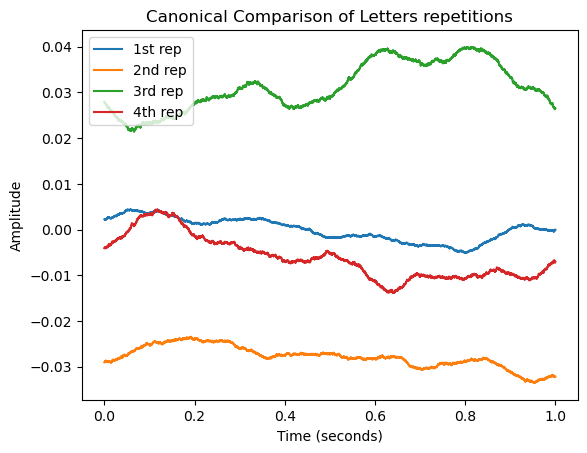

CPU times: total: 4min 24s
Wall time: 4min 56s


In [34]:
%%time

rq4_signal_dataset= signal_dataset.copy()
rq4_indexes, rq4_targets= ped.get_indexes_and_targets_by_rq(3, rq4_signal_dataset.features)
rq4_signal_dataset.features= rq4_signal_dataset.features.iloc[rq4_indexes]
rq4_signal_dataset.features.reset_index(drop=True, inplace=True)

rq4_classes_indices= get_class_indices(rq4_targets)
avg_1= signal_dataset.average_signal(rq4_classes_indices[0])
avg_2= signal_dataset.average_signal(rq4_classes_indices[1])
avg_3= signal_dataset.average_signal(rq4_classes_indices[2])
avg_4= signal_dataset.average_signal(rq4_classes_indices[3])

plot_multiple_waveforms(waveforms= [avg_1, avg_2, avg_3, avg_4], labels=['1st rep','2nd rep','3rd rep', '4th rep'],
                        title='Canonical Comparison of Letters repetitions')

### Removing constant signals (noise?)

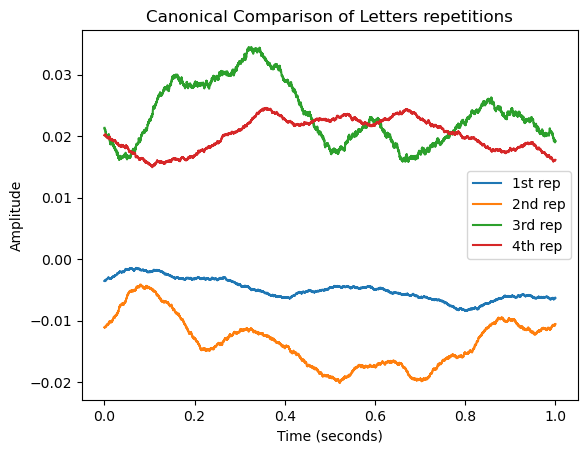

In [35]:
rq4_signal_dataset.remove_constant_signals()

rq4_signal_dataset.features.reset_index(drop=True, inplace=True)
rq4_indexes, rq4_targets= ped.get_indexes_and_targets_by_rq(3, rq4_signal_dataset.features)
rq4_signal_dataset.features= rq4_signal_dataset.features.iloc[rq4_indexes]
rq4_signal_dataset.features.reset_index(drop=True, inplace=True)

rq4_classes_indices= get_class_indices(rq4_targets)
avg_1= signal_dataset.average_signal(rq4_classes_indices[0])
avg_2= signal_dataset.average_signal(rq4_classes_indices[1])
avg_3= signal_dataset.average_signal(rq4_classes_indices[2])
avg_4= signal_dataset.average_signal(rq4_classes_indices[3])

plot_multiple_waveforms(waveforms= [avg_1, avg_2, avg_3, avg_4], labels=['1st rep','2nd rep','3rd rep', '4th rep'],
                        title='Canonical Comparison of Letters repetitions')